In [1]:
import sqlite3
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [395]:
df = pd.read_csv("diabetes_project_dataset.csv") 

In [396]:
# drop existing diabetes
df=df[df['existing_diabetes']!=1.0]
df = df.drop(['existing_diabetes'], axis = 1)

In [397]:
#drop when NA in incident_diabetes
df.dropna(axis=0,how='any',subset=['incident_diabetes'],inplace=True)

In [398]:
df.shape

(7697, 60206)

In [6]:
#select blood markers
mtb_col=[col for col in df if col.startswith('mtb_')]
data=df[mtb_col]
data.columns=mtb_col

In [7]:
#get rid of 0 and NA by adding a very small number
data=data+0.0001
data.fillna(0.0001,inplace=True)

In [8]:
data.head()

,mtb_1368087,mtb_1380093,mtb_1812369,mtb_1838668,mtb_1042362,mtb_1091716,mtb_1228672,mtb_1542487,mtb_1272352,mtb_1391826,...,mtb_2129028,mtb_2129035,mtb_2129040,mtb_2129060,mtb_2129124,mtb_2129133,mtb_2129210,mtb_2129554,mtb_2129677,mtb_2129684
1,12.524048,12.396597,8.915701,5.859628,15.870170,19.927909,11.281749,13.025676,19.707209,13.069011,...,18.938995,11.136269,5.074887,6.009384,16.353568,4.296954,3.748086,0.0001,0.0001,0.0001
2,9.891812,10.823569,8.935302,7.129269,13.763527,14.078840,9.379145,9.098772,17.783400,11.628587,...,13.882553,7.759490,0.000100,2.390844,0.000100,3.652007,6.140304,0.0001,0.0001,0.0001
3,13.192951,13.231776,9.493027,7.637989,20.835645,15.902170,8.607752,12.304995,19.097135,14.864197,...,17.269563,10.619493,0.000100,5.325568,13.148766,2.920744,3.976669,0.0001,0.0001,0.0001
4,11.095272,12.698099,10.401515,8.504186,16.343200,16.567952,12.855110,10.810744,19.652211,13.417455,...,15.158163,7.356021,0.000100,4.375035,12.825563,3.178621,5.144071,0.0001,0.0001,0.0001
5,12.471319,13.826480,9.346259,6.187012,14.951027,19.539629,11.168841,12.688400,20.984406,14.511796,...,13.733795,5.770422,0.000100,2.695456,0.000100,4.037413,5.640762,0.0001,0.0001,0.0001


In [9]:
#log transformation for blood markers
log_data=data
for i in mtb_col:
    log_data[i]=np.log(data[i])

In [10]:
log_data.head()

,mtb_1368087,mtb_1380093,mtb_1812369,mtb_1838668,mtb_1042362,mtb_1091716,mtb_1228672,mtb_1542487,mtb_1272352,mtb_1391826,...,mtb_2129028,mtb_2129035,mtb_2129040,mtb_2129060,mtb_2129124,mtb_2129133,mtb_2129210,mtb_2129554,mtb_2129677,mtb_2129684
1,2.527651,2.517422,2.187814,1.768086,2.764441,2.992121,2.423186,2.566922,2.980985,2.570244,...,2.941223,2.410207,1.624304,1.793322,2.794446,1.457906,1.321245,-9.21034,-9.21034,-9.21034
2,2.291707,2.381726,2.190010,1.964209,2.622022,2.644673,2.238489,2.208139,2.878265,2.453466,...,2.630633,2.048917,-9.210340,0.871646,-9.210340,1.295277,1.814874,-9.21034,-9.21034,-9.21034
3,2.579683,2.582621,2.250557,2.033134,3.036665,2.766456,2.152663,2.510005,2.949538,2.698955,...,2.848946,2.362691,-9.210340,1.672519,2.576328,1.071838,1.380444,-9.21034,-9.21034,-9.21034
4,2.406519,2.541452,2.341951,2.140558,2.793812,2.807470,2.553741,2.380540,2.978190,2.596556,...,2.718539,1.995519,-9.210340,1.475915,2.551440,1.156448,1.637845,-9.21034,-9.21034,-9.21034
5,2.523432,2.626586,2.234976,1.822452,2.704780,2.972445,2.413128,2.540688,3.043780,2.674962,...,2.619860,1.752745,-9.210340,0.991567,-9.210340,1.395604,1.730019,-9.21034,-9.21034,-9.21034


In [11]:
#log_data.replace(to_replace=-np.inf,value=0,inplace=True)

In [12]:
log_data.isna().sum()

mtb_1368087    0
mtb_1380093    0
mtb_1812369    0
mtb_1838668    0
mtb_1042362    0
              ..
mtb_2129133    0
mtb_2129210    0
mtb_2129554    0
mtb_2129677    0
mtb_2129684    0
Length: 60184, dtype: int64

In [13]:
#change float 64 to int32 to decrease datasize
log_data=log_data*100
ndf=log_data.astype(int)

In [14]:
ndf.head()

,mtb_1368087,mtb_1380093,mtb_1812369,mtb_1838668,mtb_1042362,mtb_1091716,mtb_1228672,mtb_1542487,mtb_1272352,mtb_1391826,...,mtb_2129028,mtb_2129035,mtb_2129040,mtb_2129060,mtb_2129124,mtb_2129133,mtb_2129210,mtb_2129554,mtb_2129677,mtb_2129684
1,252,251,218,176,276,299,242,256,298,257,...,294,241,162,179,279,145,132,-921,-921,-921
2,229,238,219,196,262,264,223,220,287,245,...,263,204,-921,87,-921,129,181,-921,-921,-921
3,257,258,225,203,303,276,215,251,294,269,...,284,236,-921,167,257,107,138,-921,-921,-921
4,240,254,234,214,279,280,255,238,297,259,...,271,199,-921,147,255,115,163,-921,-921,-921
5,252,262,223,182,270,297,241,254,304,267,...,261,175,-921,99,-921,139,173,-921,-921,-921


# Logistic regression

In [20]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot



In [68]:
# define dataset        
#y = df['incident_diabetes'][0:500]
y = df['incident_diabetes']
#X=ndf.values[0:500,]
#X=ndf.iloc[0:500,]
X=ndf
print(len(y))
X.shape

7697


(7697, 60184)

In [66]:
df[df['incident_diabetes']==1].count()

SampleID             704
incident_diabetes    704
diabetes_time        704
age                  704
male                 704
                    ... 
mtb_2129133          271
mtb_2129210          190
mtb_2129554           71
mtb_2129677           48
mtb_2129684           26
Length: 60206, dtype: int64

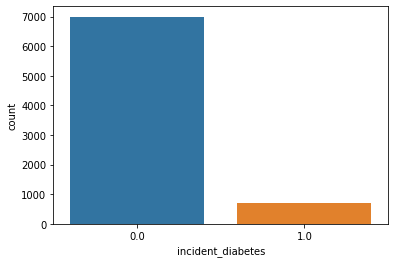

In [64]:
#check the diabetes outcome distribution
import seaborn as sns
ax=sns.countplot(x=df['incident_diabetes'])
plt.show()

In [16]:
y.isna().sum()

0

In [69]:
# define the model
model = LogisticRegression()
# fit the model
res=model.fit(X, y)

C:\Users\Zi Ye\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [137]:
# get importance
importance = model.coef_[0]

In [301]:
X=ndf
FeatureImportance=pd.DataFrame(zip(X.columns,np.transpose(model.coef_.tolist()[0])),columns=['features','coef'])
FeatureImportance

,features,coef
0,mtb_1368087,2.303096e-06
1,mtb_1380093,4.857410e-07
2,mtb_1812369,-2.716967e-07
3,mtb_1838668,2.205485e-06
4,mtb_1042362,-4.358924e-08
...,...,...
60179,mtb_2129133,-3.249141e-05
60180,mtb_2129210,1.400097e-05
60181,mtb_2129554,1.417308e-06
60182,mtb_2129677,3.609329e-05


In [81]:
importance=pd.DataFrame(importance)
importance.to_csv("importance.csv")

In [691]:
abs_importance=abs(importance)
rb=sorted(range(len(abs_importance)),key=lambda x:importance[x])[-5:]
sb=sorted(range(len(abs_importance)),key=lambda x:importance[x])[:5]
im=sb+rb
im
FeatureImportance.iloc[im,:]

,features,coef
8662,mtb_296151,-0.000378
29489,mtb_908115,-0.000352
38058,mtb_1213920,-0.000349
57557,mtb_1881432,-0.000346
49944,mtb_1677449,-0.000337
14968,mtb_501727,0.000337
55490,mtb_1849581,0.000337
3058,mtb_76692,0.000358
48857,mtb_1620434,0.000378
40517,mtb_1295574,0.000421


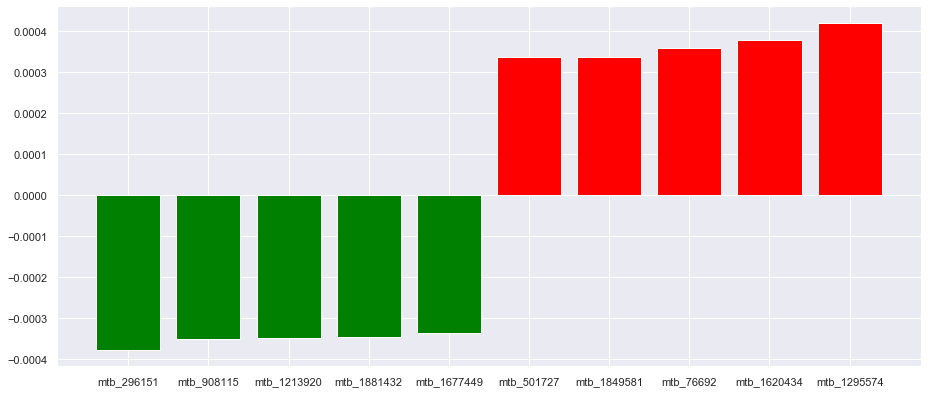

In [692]:
# plot the important biomarkers
fig=plt.figure(figsize=(12,5))
ax=fig.add_axes([0,0,1,1])
width=0.8
x=FeatureImportance.iloc[im,0]
y=FeatureImportance.iloc[im,1]
ax.bar(x,y)
plt.bar(x, y, color=['green', 'green','green','green','green','red', 'red', 'red','red','red'])
plt.show()

In [85]:
# Find 200 most important blood markers
most_important=sorted(range(len(abs_importance)),key=lambda x:abs_importance[x])[-200:]
#most_important
ndf.columns[most_important]

Index(['mtb_176481', 'mtb_1049388', 'mtb_1037289', 'mtb_1356809', 'mtb_813241',
       'mtb_593802', 'mtb_1833802', 'mtb_1396963', 'mtb_519214', 'mtb_604012',
       ...
       'mtb_1677449', 'mtb_501727', 'mtb_1849581', 'mtb_1881432',
       'mtb_1213920', 'mtb_908115', 'mtb_76692', 'mtb_1620434', 'mtb_296151',
       'mtb_1295574'],
      dtype='object', length=200)

In [77]:
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: -0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: -0.00000
Feature: 5, Score: -0.00001
Feature: 6, Score: -0.00000
Feature: 7, Score: -0.00000
Feature: 8, Score: -0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: -0.00000
Feature: 11, Score: -0.00000
Feature: 12, Score: -0.00000
Feature: 13, Score: -0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: -0.00000
Feature: 18, Score: -0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: -0.00000
Feature: 22, Score: 0.00001
Feature: 23, Score: -0.00001
Feature: 24, Score: 0.00000
Feature: 25, Score: -0.00000
Feature: 26, Score: -0.00007
Feature: 27, Score: -0.00001
Feature: 28, Score: -0.00008
Feature: 29, Score: 0.00009
Feature: 30, Score: -0.00002
Feature: 31, Score: -0.00005
Feature: 32, Score: -0.00001
Feature: 33, Score: -0.00000
Feature: 34, Score: -0.00020
Feature

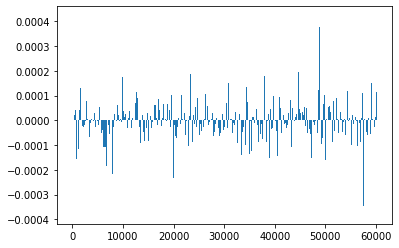

In [78]:
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [107]:
# summarize top 200 feature importance
for i,v in enumerate(importance[most_important]):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00024
Feature: 1, Score: 0.00024
Feature: 2, Score: 0.00024
Feature: 3, Score: 0.00024
Feature: 4, Score: 0.00024
Feature: 5, Score: -0.00024
Feature: 6, Score: -0.00024
Feature: 7, Score: 0.00024
Feature: 8, Score: 0.00024
Feature: 9, Score: 0.00024
Feature: 10, Score: 0.00024
Feature: 11, Score: -0.00024
Feature: 12, Score: 0.00024
Feature: 13, Score: -0.00024
Feature: 14, Score: -0.00024
Feature: 15, Score: 0.00024
Feature: 16, Score: 0.00024
Feature: 17, Score: -0.00024
Feature: 18, Score: 0.00024
Feature: 19, Score: -0.00024
Feature: 20, Score: 0.00024
Feature: 21, Score: -0.00024
Feature: 22, Score: 0.00024
Feature: 23, Score: -0.00024
Feature: 24, Score: 0.00024
Feature: 25, Score: -0.00024
Feature: 26, Score: -0.00024
Feature: 27, Score: -0.00024
Feature: 28, Score: -0.00024
Feature: 29, Score: -0.00024
Feature: 30, Score: 0.00024
Feature: 31, Score: 0.00024
Feature: 32, Score: -0.00024
Feature: 33, Score: -0.00025
Feature: 34, Score: 0.00025
Feature: 35, S

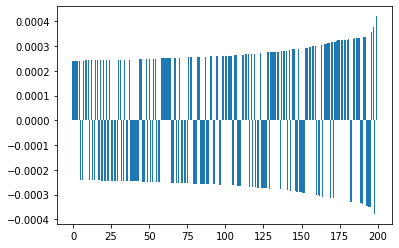

In [108]:
# plot top 200 feature importance
pyplot.bar([x for x in range(len(importance[most_important]))], importance[most_important])
pyplot.show()

In [136]:
#Get the new 200 features 
sigdf=ndf.iloc[:,most_important]
sigdf.head()

,mtb_176481,mtb_1049388,mtb_1037289,mtb_1356809,mtb_813241,mtb_593802,mtb_1833802,mtb_1396963,mtb_519214,mtb_604012,...,mtb_1677449,mtb_501727,mtb_1849581,mtb_1881432,mtb_1213920,mtb_908115,mtb_76692,mtb_1620434,mtb_296151,mtb_1295574
1,-921,49,-921,-921,-921,-921,-921,148,148,144,...,-921,-921,-921,-921,-921,116,-921,125,-921,-921
2,-921,149,-921,-921,-921,-921,-921,140,29,0,...,-921,-921,-921,175,-921,130,-921,-921,97,-921
3,-921,143,-921,-921,-921,-921,-921,163,5,33,...,-921,-921,134,-921,-921,-921,-921,94,46,349
4,-921,-921,-921,402,-921,-921,245,131,-921,124,...,-921,-921,160,138,-921,100,-921,150,53,-921
5,-921,-921,-921,402,-921,-921,-921,135,113,162,...,479,-921,-921,207,-921,59,-921,-921,-921,-921


In [ ]:
#Calculate the p value for the 200 features

In [89]:
import statsmodels.api as sm

In [160]:
smmodel=sm.Logit(endog=y,exog=X).fit()

Optimization terminated successfully.
         Current function value: 0.173837
         Iterations 8


In [161]:
smmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:      incident_diabetes   No. Observations:                 7697
Model:                          Logit   Df Residuals:                     7497
Method:                           MLE   Df Model:                          199
Date:                Sat, 17 Apr 2021   Pseudo R-squ.:                  0.4317
Time:                        08:24:04   Log-Likelihood:                -1338.0
converged:                       True   LL-Null:                       -2354.6
Covariance Type:            nonrobust   LLR p-value:                6.030e-301
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
mtb_176481   4.162e-05      0.000      0.385      0.700      -0.000       0.000
mtb_1049388     0.0004      0.000      3.780      0.000       0.000       0.001
mtb_1037289     0.0002   8.95e-05      1.721      0.085   -2.13e-05       0.000
mtb_1356809     0.0001    9.5e-05      1.250      0.211   -6.75e-05       0.000
mtb_813241      0.0003      0.000      2.668      0.008    7.35e-05       0.000
mtb_593802     -0.0003      0.000     -2.351      0.019      -0.001   -4.82e-05
mtb_1833802    -0.0003      0.000     -2.559      0.011      -0.000   -6.62e-05
mtb_1396963     0.0005      0.000      3.988      0.000       0.000       0.001
mtb_519214      0.0003      0.000      2.399      0.016    5.34e-05       0.001
mtb_604012      0.0001      0.000      1.227      0.220   -8.87e-05       0.000
mtb_1095907     0.0003      0.000      2.689      0.007    8.02e-05       0.001
mtb_1227297    -0.0003      0.000     -1.918      0.055      -0.001    5.59e-06
mtb_1787285     0.0001      0.000      1.150      0.250   -9.37e-05       0.000
mtb_128655     -0.0001      0.000     -1.279      0.201      -0.000    7.25e-05
mtb_687077   -4.96e-05      0.000     -0.424      0.672      -0.000       0.000
mtb_2110288     0.0002      0.000      1.849      0.064   -1.29e-05       0.000
mtb_635185      0.0002      0.000      1.551      0.121   -4.79e-05       0.000
mtb_963496     -0.0005      0.000     -3.897      0.000      -0.001      -0.000
mtb_467398      0.0003      0.000      2.467      0.014    5.61e-05       0.000
mtb_464115     -0.0003      0.000     -2.261      0.024      -0.001   -3.61e-05
mtb_1916698     0.0003      0.000      2.497      0.013    5.75e-05       0.000
mtb_1248391    -0.0003      0.000     -2.717      0.007      -0.000   -8.08e-05
mtb_1580674     0.0002      0.000      1.799      0.072   -1.68e-05       0.000
mtb_1295233    -0.0002      0.000     -1.883      0.060      -0.000    9.53e-06
mtb_893333      0.0005      0.000      3.452      0.001       0.000       0.001
mtb_583435     -0.0003      0.000     -2.422      0.015      -0.001   -6.01e-05
mtb_1632246    -0.0002      0.000     -1.538      0.124      -0.000     4.8e-05
mtb_358828     -0.0004      0.000     -3.478      0.001      -0.001      -0.000
mtb_1050193    -0.0002      0.000     -1.398      0.162      -0.000     6.7e-05
mtb_1800117 -7.617e-05      0.000     -0.721      0.471      -0.000       0.000
mtb_356489      0.0003      0.000      2.484      0.013    6.55e-05       0.001
mtb_212760   8.825e-05      0.000      0.793      0.428      -0.000       0.000
mtb_505805   1.228e-05      0.000      0.100      0.921      -0.000       0.000
mtb_1917087    -0.0003   9.59e-05     -2.751      0.006      -0.000   -7.58e-05
mtb_31224       0.0004      0.000      3.693      0.000       0.000       0.001
mtb_1145116 -8.802e-05   8.51e-05     -1.035      0.301      -0.000    7.87e-05
mtb_257090     -0.0003      0.000     -2.426      0.015      -0.000   -4.81e-05
mtb_328437      0.0002      0.000      1.

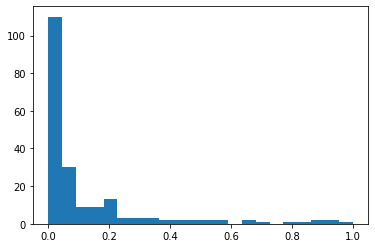

In [333]:
from histograms import histograms
p_values=smmodel.summary2().tables[1]['P>|z|']
plt.hist(p_values,bins='auto')
plt.show()

In [168]:
# remove parameter if p>0.05 
sigP=p_values[p_values<=0.05].index
len(sigP)

117

In [347]:
topp=p_values[p_values.index.isin(FeatureImportance.iloc[im,0])]
print(topp.index)
topFP=pd.DataFrame(zip(p_values.index,np.transpose(p_values.tolist())),columns=['features','p'])
topFP

Index(['mtb_1677449', 'mtb_501727', 'mtb_1849581', 'mtb_1881432',
       'mtb_1213920', 'mtb_908115', 'mtb_76692', 'mtb_1620434', 'mtb_296151',
       'mtb_1295574'],
      dtype='object')


,features,p
0,mtb_176481,7.000166e-01
1,mtb_1049388,1.565397e-04
2,mtb_1037289,8.516620e-02
3,mtb_1356809,2.114040e-01
4,mtb_813241,7.630432e-03
...,...,...
195,mtb_908115,2.465246e-02
196,mtb_76692,3.533761e-07
197,mtb_1620434,4.076597e-08
198,mtb_296151,3.039032e-03


In [387]:
topBM=pd.merge(topFP,FeatureImportance,how='inner',on='features')
topBMi=sorted(range(len(topBM)),key=lambda x:topBM.coef[x])[-10:]

In [361]:
topBM.iloc[topBMi,:]

,features,p,coef
172,mtb_571655,8.947571e-02,0.000316
173,mtb_1340304,2.583890e-06,0.000322
174,mtb_665404,2.037395e-02,0.000323
175,mtb_1548092,5.430622e-03,0.000324
176,mtb_809288,6.657025e-02,0.000324
177,mtb_688132,2.132002e-02,0.000326
178,mtb_110238,8.692204e-02,0.000326
179,mtb_510412,3.355492e-01,0.000326
180,mtb_1874797,1.914642e-01,0.000326
181,mtb_959762,1.226175e-03,0.000327


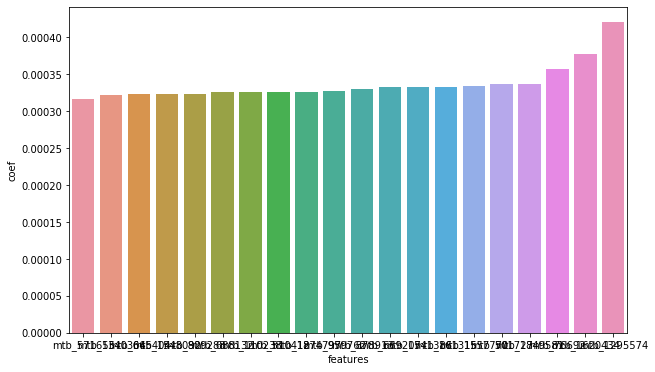

In [382]:
import matplotlib.pyplot as plt

x = topBM.iloc[topBMi,0]


y = topBM.iloc[topBMi,1]
z = topBM.iloc[topBMi,2]

df=topBM.iloc[topBMi,:]
plt.figure(figsize=(10, 6))
sns.barplot(x="features",  y='coef', data=df)
plt.show()

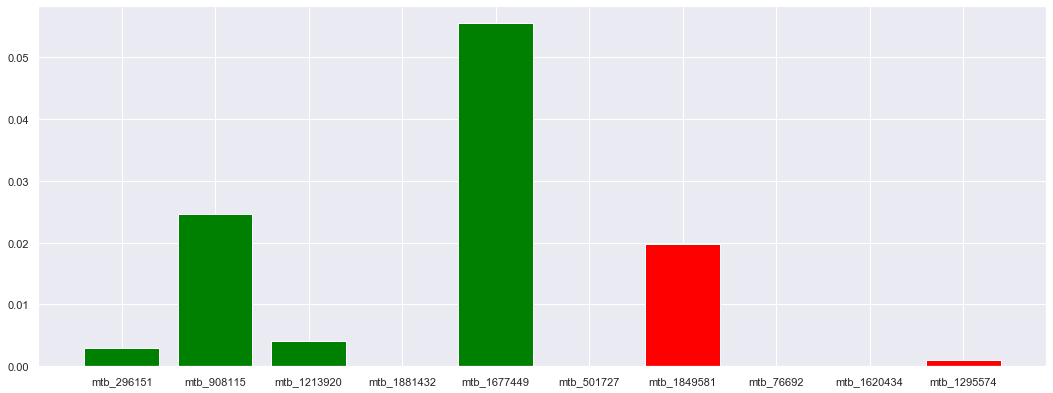

In [689]:
# plot the p-values of important biomarkers
rb=sorted(range(len(topBM.coef)),key=lambda x:topBM.coef[x])[-5:]
sb=sorted(range(len(topBM.coef)),key=lambda x:topBM.coef[x])[:5]
im=sb+rb
fig=plt.figure(figsize=(14,5))
ax=fig.add_axes([0,0,1,1])
width=0.8
x=topBM.iloc[im,0]
y=topBM.iloc[im,1]
ax.bar(x,y)
plt.bar(x, y, color=['green', 'green','green','green','green','red', 'red', 'red','red','red'])
plt.show()

In [171]:
finaldf=sigdf.loc[:,sigP]
finaldf.shape

(7697, 117)

# ML prediction

In [272]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc,recall_score,precision_score,roc_auc_score,accuracy_score,mean_squared_error

In [273]:
X=finaldf
#y=df.diabetes_time
y=df.incident_diabetes

C:\Users\Zi Ye\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:32:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


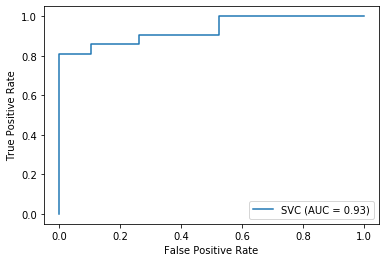

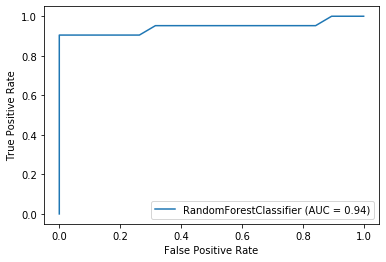

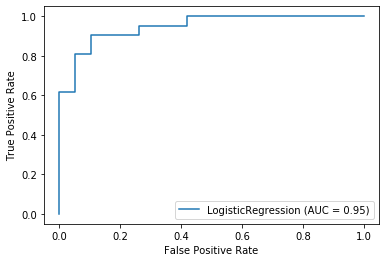

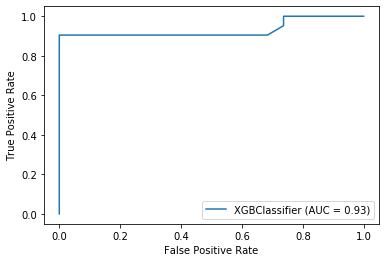

In [274]:
#use multiple ml algorithms for model fitting
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve
from sklearn.ensemble import RandomForestClassifier

X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

svc = SVC(random_state=42)
svc.fit(X_train, y_train)
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
logreg=LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
xg_reg = xgb.XGBClassifier(random_state=42)
xg_reg.fit(X_train, y_train)

svc_disp = plot_roc_curve(svc, X_test, y_test)
rfc_disp = plot_roc_curve(rfc, X_test, y_test)

logreg_disp = plot_roc_curve(logreg, X_test, y_test)
xgbreg_disp = plot_roc_curve(xg_reg, X_test, y_test)
xgb_disp.figure_.suptitle("ROC curve comparison")

plt.show()

[10:32:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Zi Ye\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


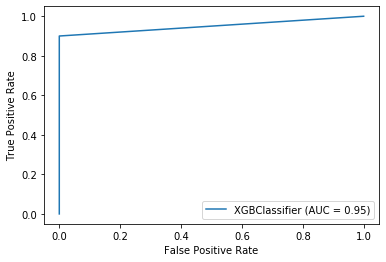

In [275]:
# XGboost can perform better after some parameter adjustment
data_dmatrix = xgb.DMatrix(data=X,label=y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=123)

xg_reg = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.1, learning_rate = 0.5,
                max_depth = 25, alpha = 10, n_estimators = 300,booster='gbtree')


xg_reg.fit(X_train,y_train)
#preds = xg_reg.predict(X_test)
roc_auc_score(y_test, xg_reg.predict(X_test))

xgbreg_disp = plot_roc_curve(xg_reg, X_test, y_test)

In [276]:
# just to check accuracy
xgpreds = xg_reg.predict(X_test)
accuracy=accuracy_score(y_test,xgpreds)
accuracy

0.95

In [277]:
svcpreds = svc.predict(X_test)
accuracy=accuracy_score(y_test,svcpreds)
print(accuracy)

rfcpreds = rfc.predict(X_test)
accuracy=accuracy_score(y_test,rfcpreds)
print(accuracy)

logregpreds = logreg.predict(X_test)
accuracy=accuracy_score(y_test,logregpreds)
accuracy

0.925
0.95


0.95

In [278]:
X=finaldf
y=df.diabetes_time.to_list()
#y=df.incident_diabetes
#y.unique()
type(y)
#X, y = make_classification(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [287]:
#use multiple ml algorithms for model fitting
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
#use multiple ml algorithms for model fitting


l=LinearRegression()
l.fit(X_train, y_train)
lpreds = l.predict(X_test)
logregpreds
print(mean_squared_error(y_test, lpreds))

xg_reg = xgb.XGBRegressor(colsample_bytree = 0.1, learning_rate = 0.01,
                max_depth = 10, alpha = 10, n_estimators = 800,booster='gbtree')
xg_reg.fit(X_train, y_train)
xgpreds = xg_reg.predict(X_test)
print(mean_squared_error(y_test, xgpreds))


7.203285033353501
7.096043348004326


C:\Users\Zi Ye\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


# Clustering

In [462]:
# get the data with only
cldf=finaldf[df['incident_diabetes']==1]

In [420]:

import sklearn
import seaborn as sns; sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
#from sklearn.preprocessing import StandardScaler
#%matplotlib inlinefrom sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# Standardizing the features

In [463]:
#visualization
#pca
cldf2=cldf.copy()
x = cldf2.values
#principalComponents = pca.fit_transform(x)
features = cldf2.columns
#pca = PCA(n_components=2)
#pca.fit(x)

df_transform = StandardScaler().fit_transform(cldf)
pca = PCA(n_components=2).fit(df_transform)
pca_result = pca.transform(df_transform)
var_exp = pca.explained_variance_ratio_

#pca = PCA(n_components=2)
#pca_result = pca.fit_transform(cldf.values)
cldf2['pca-one'] = pca_result[:,0]
cldf2['pca-two'] = pca_result[:,1] 
#cldf['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

#t-SNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(x)
cldf2['tsne-2d-one'] = tsne_results[:,0]
cldf2['tsne-2d-two'] = tsne_results[:,1]
print('t-SNE is done!')

Explained variation per principal component: [0.06042645 0.04170889]
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 704 samples in 0.012s...
[t-SNE] Computed neighbors for 704 samples in 0.092s...
[t-SNE] Computed conditional probabilities for sample 704 / 704
[t-SNE] Mean sigma: 1830.764390
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.201897
[t-SNE] KL divergence after 300 iterations: 1.611323
t-SNE is done!


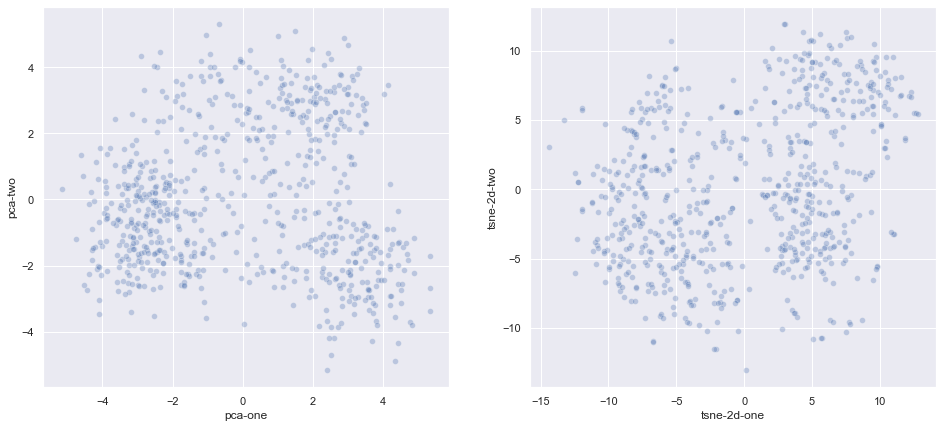

In [464]:
#plot

plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    palette=sns.color_palette("hls", 10),
    data=cldf2,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x=cldf2['tsne-2d-one'], y=cldf2['tsne-2d-two'],
    
    palette=sns.color_palette("hls", 10),
    data=cldf2,
    legend="full",
    alpha=0.3,
    ax=ax2
)

In [465]:
# use elbow plot to determine optimun number of cluster
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(cldf)
    distortions.append(kmeanModel.inertia_)

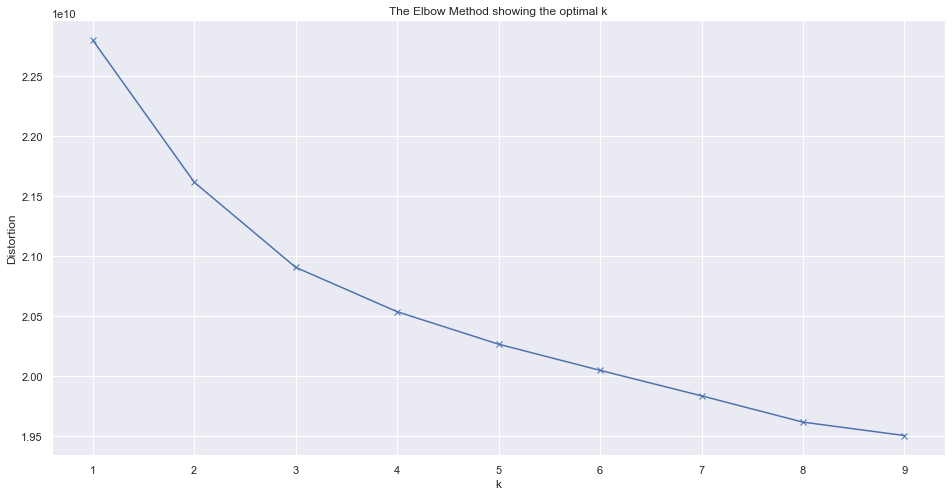

In [466]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [467]:
# Importing Modules
from sklearn import datasets
from sklearn.cluster import KMeans

# Declaring Model
model = KMeans(n_clusters=3)

# Fitting Model
model.fit(cldf.values)

# Predicitng a single input
#predicted_label = model.predict([[7.2, 3.5, 0.8, 1.6]])

# Prediction on the entire data
all_predictions = model.predict(cldf.values)

# Printing Predictions
#print(predicted_label)
print(all_predictions)

[0 0 2 0 2 2 2 2 2 0 1 1 1 1 1 2 2 2 2 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 2 1
 2 0 0 0 1 2 2 1 1 1 1 1 0 1 1 1 1 1 2 2 2 2 1 0 0 0 0 0 0 0 0 0 2 1 1 1 1
 1 1 2 1 2 2 0 1 2 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 1 2 2 2 0 0 1 0 0 1 2 1
 1 1 1 1 1 1 1 1 2 1 2 2 1 2 2 2 2 2 1 1 2 1 1 0 0 0 1 1 2 1 1 0 1 1 0 0 0
 1 1 2 2 2 2 2 2 2 1 0 1 2 0 1 2 1 1 1 1 2 1 1 1 2 2 2 1 2 2 1 2 2 2 2 0 1
 0 2 2 2 0 0 0 2 2 2 2 2 2 2 2 1 1 1 1 1 1 0 1 1 1 1 1 2 1 2 1 1 2 1 1 0 1
 1 1 0 1 1 1 1 1 1 1 1 1 2 1 2 0 0 0 1 1 1 1 2 2 1 0 1 1 2 2 1 2 0 0 2 1 1
 0 0 0 1 2 1 2 2 1 1 1 2 2 2 1 1 1 0 1 0 1 1 2 2 1 1 1 1 1 2 0 0 2 0 0 2 1
 2 1 2 0 0 2 1 1 0 1 1 0 1 2 0 1 0 0 2 0 1 2 2 2 2 1 1 2 2 2 0 0 1 1 1 2 2
 1 1 1 1 2 2 1 2 2 2 1 0 0 2 2 1 1 0 0 0 0 2 2 2 2 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 0 0 0 0 2 0 1 2 2 1 2 1 1 1 1 1 1 1 1 1 1 0 2 0 0 0 0
 0 1 2 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 1 1 0 2 1 1 1 2 1 2 0 2
 2 2 0 0 0 0 0 2 2 0 0 0 0 0 0 2 0 2 0 0 0 0 0 2 1 1 2 0 0 0 0 2 2 2 1 2 0
 2 0 2 2 2 1 1 1 1 1 1 1 

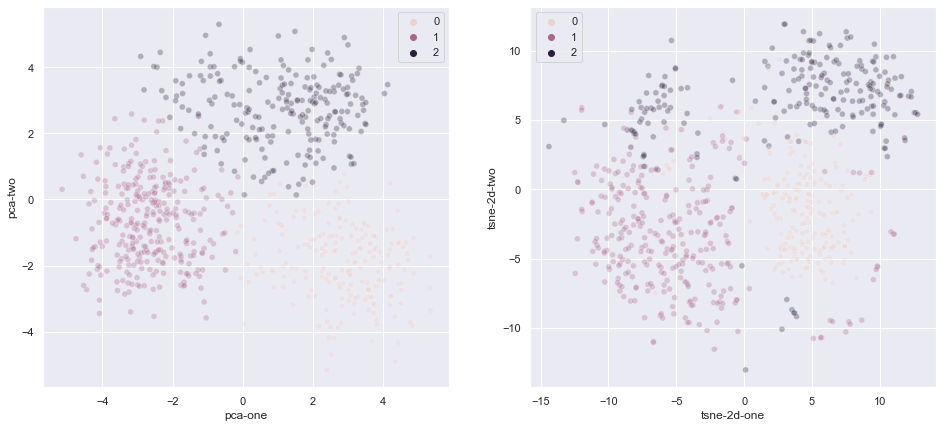

In [468]:

#plot

plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue=all_predictions,
    #palette=sns.color_palette("hls", 10),
    data=cldf2,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x=cldf2['tsne-2d-one'], y=cldf2['tsne-2d-two'],
    hue=all_predictions,
    #palette=sns.color_palette("hls", 10),
    data=cldf2,
    legend="full",
    alpha=0.3,
    ax=ax2
)

In [475]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from collections import defaultdict
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import StandardScaler

class PFA(object):
    def __init__(self, n_features, q=None):
        self.q = q
        self.n_features = n_features

    def fit(self, X):
        if not self.q:
            self.q = X.shape[1]

        sc = StandardScaler()
        X = sc.fit_transform(X)

        pca = PCA(n_components=self.q).fit(X)
        A_q = pca.components_.T

        kmeans = KMeans(n_clusters=self.n_features).fit(A_q)
        clusters = kmeans.predict(A_q)
        cluster_centers = kmeans.cluster_centers_

        dists = defaultdict(list)
        for i, c in enumerate(clusters):
            dist = euclidean_distances([A_q[i, :]], [cluster_centers[c, :]])[0][0]
            dists[c].append((i, dist))

        self.indices_ = [sorted(f, key=lambda x: x[1])[0][0] for f in dists.values()]
        self.features_ = X[:, self.indices_]

In [482]:
import numpy as np


pfa = PFA(n_features=3)
pfa.fit(cldf)

# To get the transformed matrix
X = pfa.features_

# To get the column indices of the kept features
column_indices = pfa.indices_
column_indices
pfa.features_[702]

array([ 1.07331836, -0.60263628,  0.58676537])

In [470]:
## hierachicial clustering

In [484]:
cldf.shape[1]

117

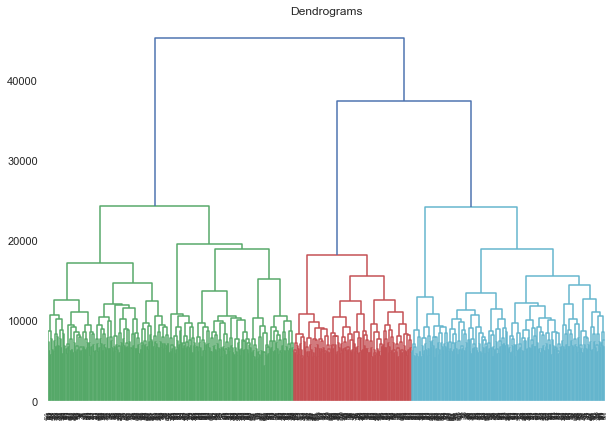

In [469]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(cldf2, method='ward'))

In [473]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
hpredict=cluster.fit_predict(cldf)

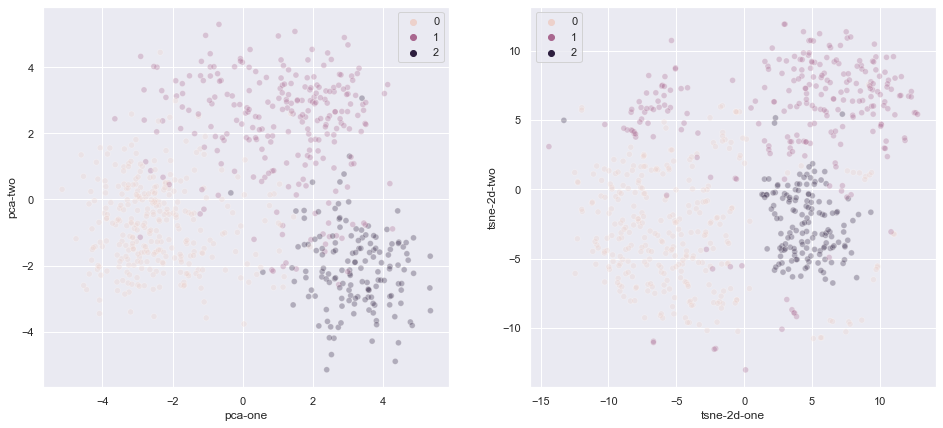

In [474]:
#plot

plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue=hpredict,
    #palette=sns.color_palette("hls", 10),
    data=cldf2,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x=cldf2['tsne-2d-one'], y=cldf2['tsne-2d-two'],
    hue=hpredict,
    #palette=sns.color_palette("hls", 10),
    data=cldf2,
    legend="full",
    alpha=0.3,
    ax=ax2
)

In [ ]:

for(n in 1:n_clusters) {
    c1=len(all_predictions[all_predictions==0])
    c2=len(all_predictions[all_predictions==1])
    c3=len(all_predictions[all_predictions==2])
  for(i in range(cldf.shape[1])){
      gene=cldf.columns[i]
      gc1=cldf[gene][all_predictions==0].mean()
      gc1=cldf[gene][all_predictions==0].mean()
      gc1=cldf[gene][all_predictions==0].mean()
  }
}

result

In [493]:
len(all_predictions[all_predictions==0])

196

In [494]:
cldf.columns[3]

'mtb_1833802'

In [500]:
(cldf['mtb_1833802'][all_predictions==1].mean()-cldf['mtb_1833802'].mean())/cldf['mtb_1833802'].std()

-0.18935059615190267

In [517]:
cldf3=cldf.copy()
cldf3['predictions']=all_predictions

In [518]:
cldf3.head()

,mtb_1049388,mtb_813241,mtb_593802,mtb_1833802,mtb_1396963,mtb_519214,mtb_1095907,mtb_963496,mtb_467398,mtb_464115,...,mtb_501727,mtb_1849581,mtb_1881432,mtb_1213920,mtb_908115,mtb_76692,mtb_1620434,mtb_296151,mtb_1295574,predictions
3,143,-921,-921,-921,163,5,182,-921,-921,-921,...,-921,134,-921,-921,-921,-921,94,46,349,0
7,-921,175,-921,-921,167,74,111,-921,36,-921,...,-921,-921,-921,-921,166,183,72,-921,347,0
21,-921,-921,-921,195,-921,201,198,88,-921,-921,...,88,-921,-921,208,-921,-921,201,-921,352,2
39,121,143,251,-921,140,75,-921,-921,-921,265,...,-921,-921,-921,-921,-921,221,62,-921,-921,0
43,-921,134,183,-921,101,-921,155,-921,126,197,...,-921,179,195,201,-921,-921,-921,107,387,2


In [557]:
cluster1 = cldf3[cldf3['predictions'] == 0] # Use a mask to subset dataset to cells assigned to cluster 2
not_cluster1 = cldf3[cldf3['predictions'] != 0]

cluster2 = cldf3[cldf3['predictions'] == 1] # Use a mask to subset dataset to cells assigned to cluster 2
not_cluster2 = cldf3[cldf3['predictions'] != 1]

cluster3 = cldf3[cldf3['predictions'] == 2] # Use a mask to subset dataset to cells assigned to cluster 2
not_cluster3 = cldf3[cldf3['predictions'] != 2]

In [596]:
import scanpy as sc
import anndata as ad

In [657]:
# number of observations
n_obs = cldf.shape[0]
# say we measure the time of observing the data points
# add them to a dataframe for storing some annotation
obs = pd.DataFrame()
#obs['cluster'] = all_predictions
#pred=all_predictions.astype('category')
cat = pd.Categorical(all_predictions)
obs['clusters'] = cat
obs['cluster'] = all_predictions
# set the names of variables/features to the following
# ['A', 'B', 'C', ..., 'AA', 'BB', 'CC', ..., 'AAA', ...]
var_names = cldf.columns 
# number of variables
n_vars = len(var_names)
# dataframe for annotating the variables
var = pd.DataFrame(index=var_names)
# the data matrix of shape n_obs x n_vars
X = cldf.values

In [658]:
# we're using an integer data type just for prettier outputs
# the default 'float32' is flexible and precise enough for most purposes
adata = ad.AnnData(X, obs=obs, var=var, dtype='int32')
print(adata)

AnnData object with n_obs × n_vars = 704 × 117
    obs: 'clusters', 'cluster'


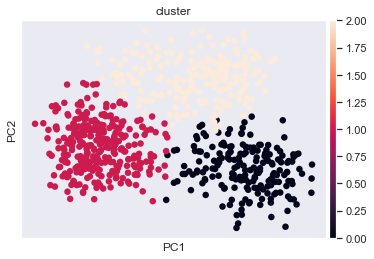

In [659]:
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca(adata, color='cluster')

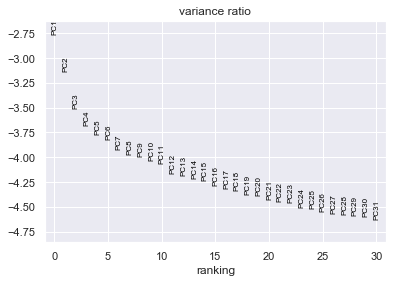

In [660]:
sc.pl.pca_variance_ratio(adata, log=True)

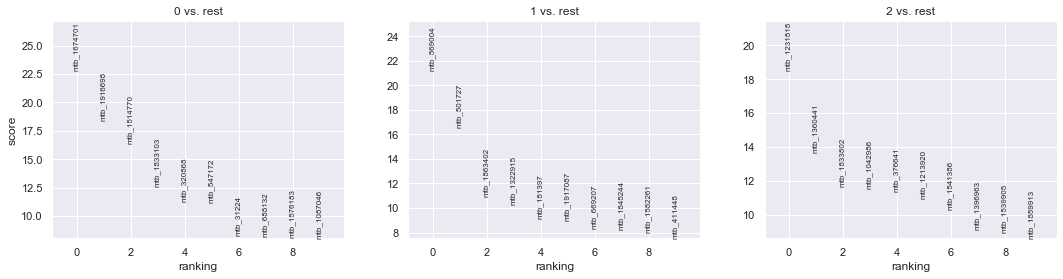

In [662]:
sc.tl.rank_genes_groups(adata, 'clusters', method='t-test')
sc.pl.rank_genes_groups(adata, n_genes=10, sharey=False)

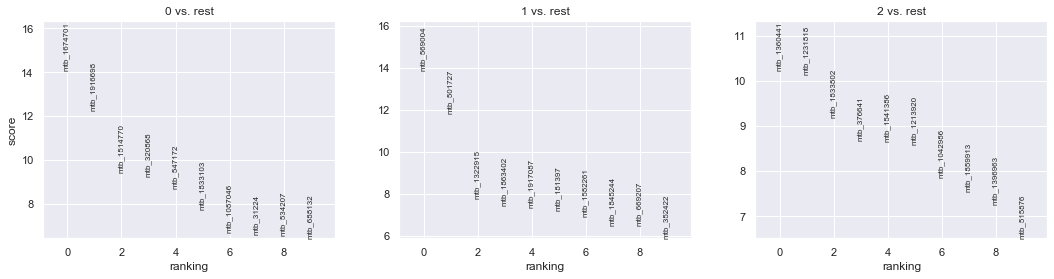

In [663]:
sc.tl.rank_genes_groups(adata, 'clusters', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=10, sharey=False)

In [665]:
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(5)

,0,1,2
0,mtb_1674701,mtb_569004,mtb_1360441
1,mtb_1916698,mtb_501727,mtb_1231818
2,mtb_1514770,mtb_1322915,mtb_1833802
3,mtb_320868,mtb_1863402,mtb_376641
4,mtb_547172,mtb_1917087,mtb_1541386


In [668]:
adata.uns['rank_genes_groups']['names'][0:5]

rec.array([('mtb_1674701', 'mtb_569004', 'mtb_1360441'),
           ('mtb_1916698', 'mtb_501727', 'mtb_1231818'),
           ('mtb_1514770', 'mtb_1322915', 'mtb_1833802'),
           ('mtb_320868', 'mtb_1863402', 'mtb_376641'),
           ('mtb_547172', 'mtb_1917087', 'mtb_1541386')],
          dtype=[('0', 'O'), ('1', 'O'), ('2', 'O')])

In [680]:
adata.uns['rank_genes_groups']['names'][2]


('mtb_1514770', 'mtb_1322915', 'mtb_1833802')

In [682]:
markers = ['mtb_1674701', 'mtb_569004', 'mtb_1360441','mtb_1916698', 'mtb_501727', 'mtb_1231818','mtb_1514770', 'mtb_1322915', 'mtb_1833802']

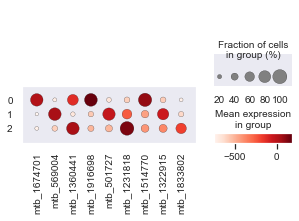

In [684]:
sc.pl.dotplot(adata, markers, groupby='clusters');